# BERT AND SVM FOR- SPAM DETECTION

# 1. Install and Import Dependencies

# BERT

In [20]:
#pip install --upgrade torch


In [21]:
#pip install --upgrade transformers safetensors


In [22]:
import matplotlib.pyplot as plt



In [4]:
import string
import nltk
from nltk.stem import PorterStemmer
import re
import torch
from transformers import BertTokenizer, BertModel

## BERT

In [5]:
import pandas as pd

file_path = "D:/2024/NCI/Semester 3/Practicum 2/GitHub/BERT test/BERTSentiment/spam.csv" 
df = pd.read_csv(file_path, encoding="latin-1")
#df.head()

# Initialize BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# Function to generate embeddings
def get_bert_embeddings(text):
    # Tokenize and encode the text
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=512)
    
    # Get the BERT output
    with torch.no_grad():
        outputs = model(**inputs)

    # Take the embedding of the [CLS] token
    cls_embedding = outputs.last_hidden_state[:, 0, :].squeeze()
    return cls_embedding

# Generate embeddings for each text in the dataframe
df['embeddings'] = df['v2'].apply(get_bert_embeddings)



In [6]:
df[['v2', 'embeddings']]
#df.to_csv( "D:/2024/NCI/Semester 3/Practicum 2/GitHub/BERT test/BERTSentiment/embeddings.csv" )

,v2,embeddings
0,"Go until jurong point, crazy.. Available only ...","[tensor(-0.1513), tensor(-0.3229), tensor(0.18..."
1,Ok lar... Joking wif u oni...,"[tensor(-0.1238), tensor(0.3435), tensor(-0.00..."
2,Free entry in 2 a wkly comp to win FA Cup fina...,"[tensor(-0.5031), tensor(-0.2829), tensor(0.57..."
3,U dun say so early hor... U c already then say...,"[tensor(0.0646), tensor(0.5769), tensor(0.3411..."
4,"Nah I don't think he goes to usf, he lives aro...","[tensor(0.0947), tensor(0.3897), tensor(0.0389..."
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,"[tensor(-0.0725), tensor(0.0551), tensor(0.620..."
5568,Will Ì_ b going to esplanade fr home?,"[tensor(-0.0089), tensor(0.1375), tensor(0.270..."
5569,"Pity, * was in mood for that. So...any other s...","[tensor(-0.0464), tensor(0.0716), tensor(-0.28..."
5570,The guy did some bitching but I acted like i'd...,"[tensor(0.2887), tensor(0.2153), tensor(-0.353..."


# SVM + BERT

In [ ]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Convert labels to numerical values (e.g., "ham" -> 0, "spam" -> 1)
df['label'] = df['v1'].apply(lambda x: 1 if x == 'spam' else 0)

# Convert embeddings to a 2D array format
X = np.array([embedding.numpy() for embedding in df['embeddings']])
y = df['label'].values

#print(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
svm_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto',class_weight='balanced' )
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


[[-0.15130727 -0.3229222   0.18984713 ... -0.50618005  0.63785505
   0.5440413 ]
 [-0.12379777  0.34354404 -0.00094409 ... -0.2943518   0.31472555
   0.5676157 ]
 [-0.50309676 -0.28293917  0.57477814 ... -0.20974316  0.28015417
   0.6524728 ]
 ...
 [-0.0463751   0.07157721 -0.2811311  ... -0.44609916  0.69265306
   0.49261114]
 [ 0.2887196   0.21530673 -0.35321572 ... -0.30588982  0.02576478
   0.05279774]
 [-0.62542605  0.01535252  0.06213274 ... -0.31538567  0.53805614
   0.7060135 ]] [0 0 1 ... 0 0 0]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.96      0.96       150

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



In [ ]:
# pip install matplotlib seaborn


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.



  Using cached https://files.pythonhosted.org/packages/16/51/58b0b9de42fe1e665736d9286f88b5f1556a0e22bed8a71f468231761083/matplotlib-3.7.5-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/75/7f/3c4e038998d2a54b282d605f6aaac4c596c49d55add3adc6559a735bb4cb/fonttools-4.54.1-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/96/1b/b05cd42c8d21767a0488b883b38658fb9a45f86c293b7b42521a8113dc5d/contourpy-1.1.1-cp38-cp38-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/52/77/7e04cca2ff1dc6ee6b7654cebe233de72b7a3ec5616501b6f3144fb70740/kiwisolver-1.4.7-cp38-cp38-win_amd64.whl


## CONFUSION MATRIX

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.95      0.96      0.96       150

    accuracy                           0.99      1115
   macro avg       0.97      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115



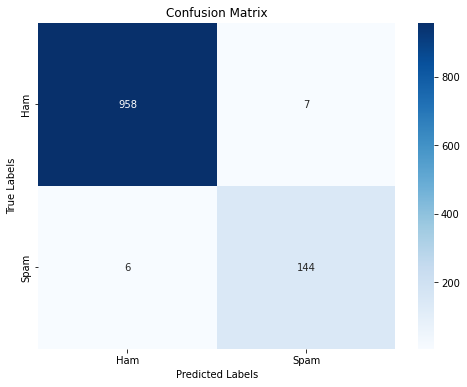

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


## SVM Traditional Technique

In [19]:
df = pd.read_csv(file_path, encoding="latin-1")
df= df[['v1', 'v2']]
df= df.rename(columns = {'v1': 'label', 'v2': 'text'})
#df.info()
#df.head()
# # 2. Cleaning data
#1. Removing Punctuation
import string
string.punctuation
def remove_punctuation(txt):
    txt_nopunct="".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct
df['newtext']=df['text'].apply(lambda x: remove_punctuation(x))
#Show top 10 messages with puncuation removed. Output is a , seperated list
df.head(10)['newtext'].values
#df.head()

#2. tokenisation of data
import re
def tokenize(txt):
    tokens=re.split('\W+', txt)
    return tokens
#convert to lower case
df['token_text']=df['newtext'].apply(lambda x: tokenize(x.lower()))
df.head()

#3. remove stop words
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenize):
    clean=[word for word in tokenize if word not in stopwords]
    return clean
df['stop_clean']=df['token_text'].apply(lambda x: remove_stopwords(x))
#df.head()

#4. stemming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
def stemming(txt):
    words=[ps.stem(word) for word in txt]
    return words
df['stem_words']=df['stop_clean'].apply(lambda x: stemming(x))
df.head()
#5. lemmatisation
def lammatization(txt):
    lam=[wn.lammetize(word) for word in txt]
    return lam
df['lam_words']=df['stem_words'].apply(lambda x: stemming(x))
df.head()
#as our "lam_words column is column of lists, and not text.
#Tfidf Vectoriser works on text so convert this column into string"
df['lam_words']=[" ".join(review) for review in df['lam_words'].values]

# # 3. split data into sets
from sklearn import model_selection, naive_bayes, svm
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['lam_words'],df['label'],test_size=0.2)
# # 4. encoding
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# # 5. Word Vectorisation
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(df['lam_words'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
#print(Tfidf_vect.vocabulary_)
#print(Train_X_Tfidf)
# # 6. Use the ML Algorithms to Predict the outcome

# 1.Naive Bayes Classifier
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
# 2. Support Vector Machine

# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto', class_weight='balanced' )
SVM.fit(Train_X_Tfidf,Train_Y)

# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)
#Lets try some test data
test = ["free entry"]
X_test=Tfidf_vect.transform(test)
SVM.predict(X_test)
#test1 = ["is that how you spell his name"]
#X_test1=Tfidf_vect.transform(test1)
#SVM.predict(X_test1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fernando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Naive Bayes Accuracy Score ->  97.13004484304932
SVM Accuracy Score ->  98.02690582959642


array([1])

In [20]:
# Make predictions on the test set
y_pred = SVM.predict(Test_X_Tfidf)

# Evaluate the model
print(classification_report(Test_Y, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       969
           1       0.96      0.89      0.92       146

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

